##### note: https://learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [62]:
img_name = "xray.jpeg"

In [63]:
# please edit it to suit your root
root_path = "/home/hoang_mata/Desktop/computer-vision-basics/image_processing/"

In [64]:
!pwd

/home/hoang_mata/Desktop/computer-vision-basics/image_processing


# 1. Image negation

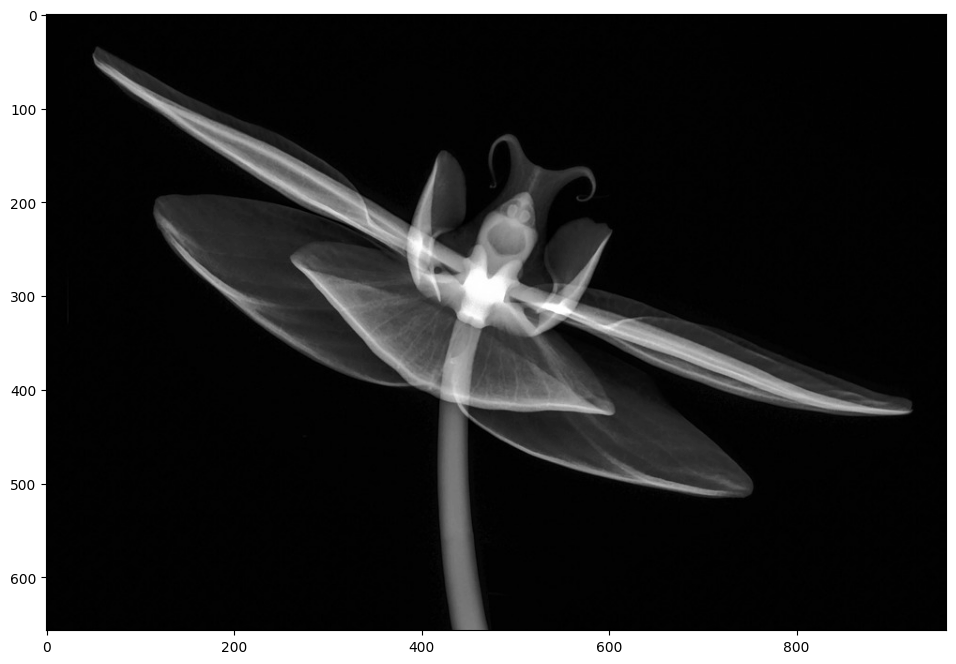

In [65]:
xray = cv2.imread(root_path + img_name, 0)
plt.imshow(xray, cmap='gray')
plt.show()

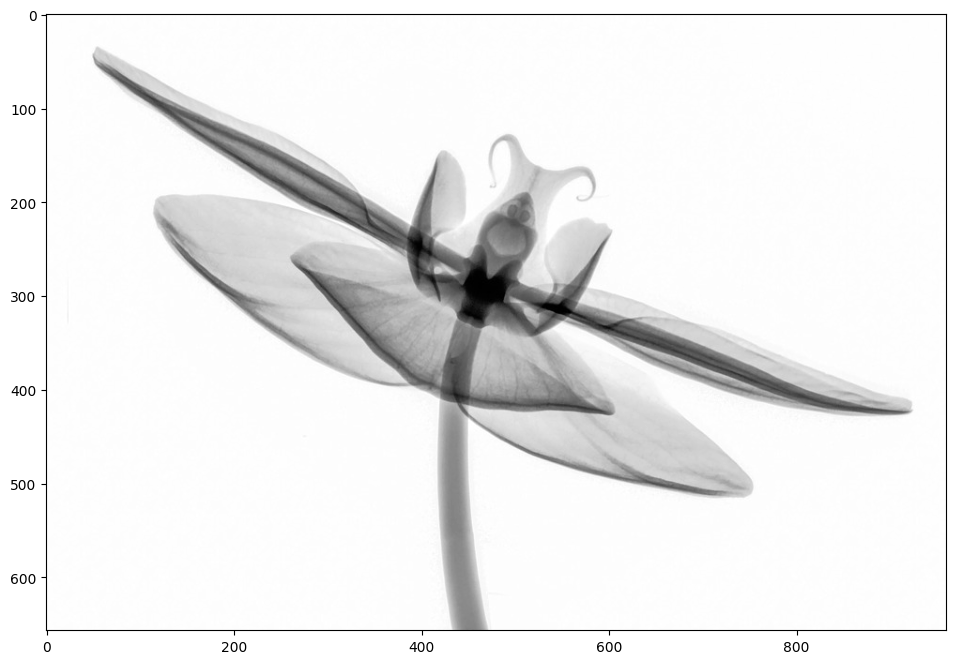

In [66]:
negation = 255 - xray
plt.imshow(negation, cmap='gray')

# 2. Gamma correction

In [67]:
def draw_quantization_img(levels, height=32):
    img = [levels] * height
    img = np.array(img)
    plt.imshow(img, 'gray')

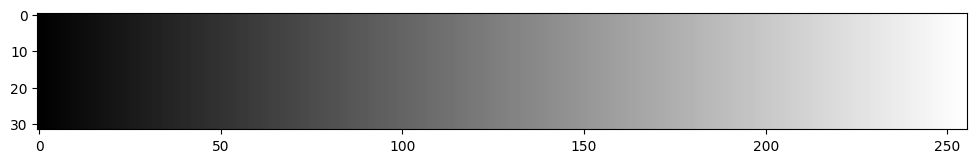

In [68]:
gray_256 = list(range(0, 256, 1))
draw_quantization_img(gray_256)

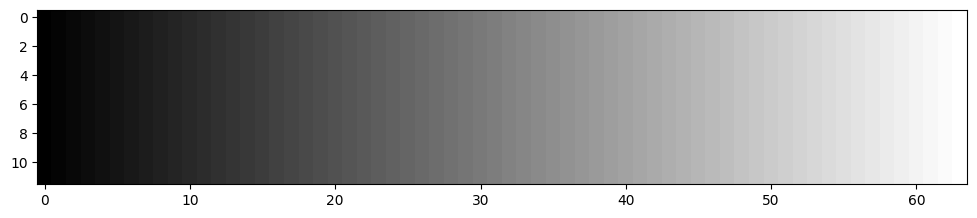

In [69]:
gray_64 = list(range(0, 256, 4))
draw_quantization_img(gray_64, 12)

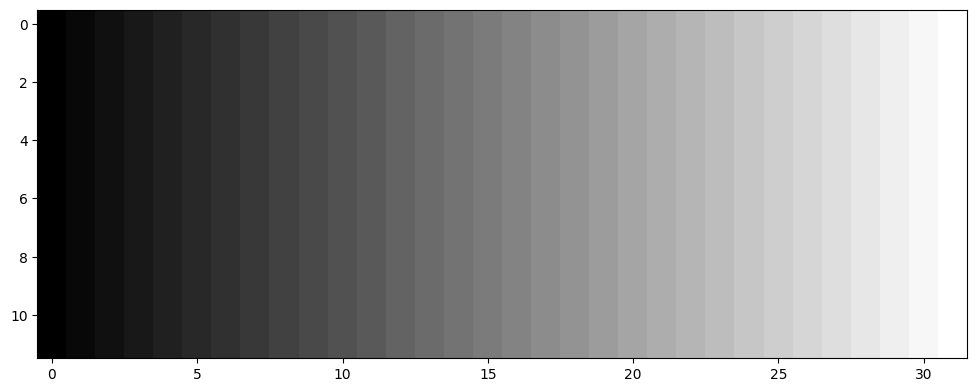

In [70]:
gray_32 = list(range(0, 256, 8))
draw_quantization_img(gray_32, height=12)

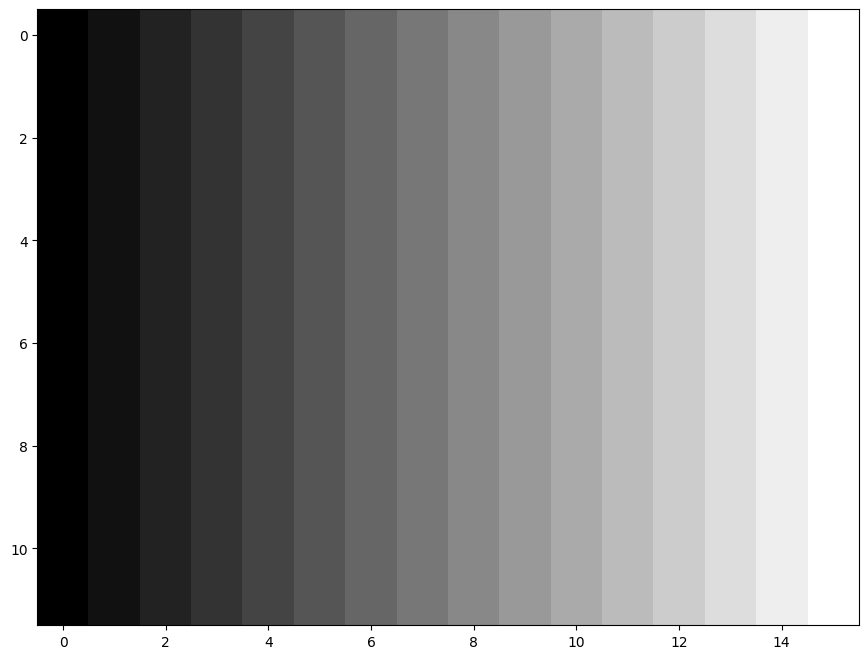

In [71]:
gray_16 = list(range(0, 256, 16))
draw_quantization_img(gray_16, height=12)

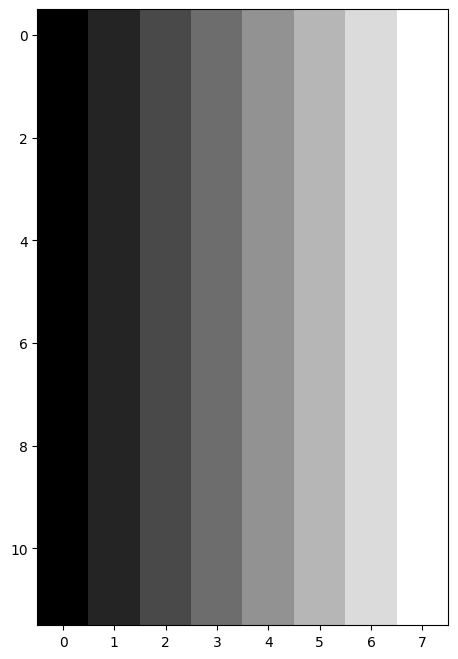

In [72]:
gray_8 = list(range(0, 256, 32))
draw_quantization_img(gray_8, height=12)

## Gamma

In [73]:
def adjust_gamma(inlevels, gamma=1.0, debug=True):
    out = [l**gamma for l in inlevels]
    max_out = max(out)
    out = [int(l/max_out * 256) for l in out]
    return out

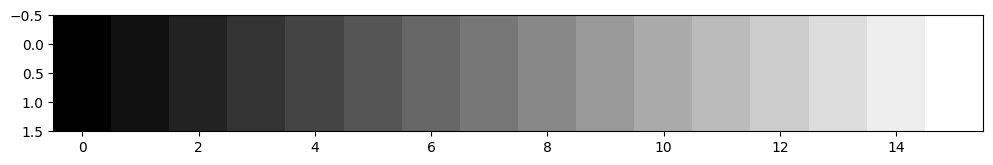

In [74]:
draw_quantization_img(
    adjust_gamma(gray_16, gamma=1.0),
    height=2
)

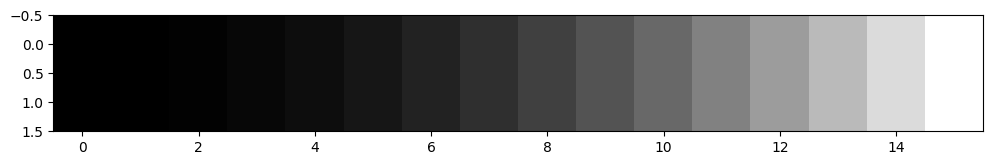

In [75]:
draw_quantization_img(
        adjust_gamma(gray_16, gamma=2.2),
        height=2
)

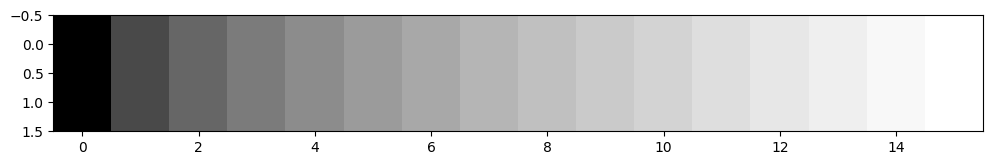

In [76]:
draw_quantization_img(
        adjust_gamma(gray_16, gamma=1/2.2, debug=True),
        height=2
)

## Logarithmic graph

In [77]:
x = np.arange(0, 1.2, 0.01)
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19])

In [78]:
g1 = np.power(x, 1)
g1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19])

In [79]:
g2 = np.power(x, 2.2)
g2

array([0.00000000e+00, 3.98107171e-05, 1.82922021e-04, 4.46340978e-04,
       8.40488897e-04, 1.37320068e-03, 2.05084459e-03, 2.87882780e-03,
       3.86187286e-03, 5.00418689e-03, 6.30957344e-03, 7.78151049e-03,
       9.42320722e-03, 1.12376467e-02, 1.32276190e-02, 1.53957472e-02,
       1.77445080e-02, 2.02762495e-02, 2.29932050e-02, 2.58975048e-02,
       2.89911865e-02, 3.22762038e-02, 3.57544332e-02, 3.94276815e-02,
       4.32976905e-02, 4.73661427e-02, 5.16346652e-02, 5.61048339e-02,
       6.07781769e-02, 6.56561776e-02, 7.07402777e-02, 7.60318795e-02,
       8.15323485e-02, 8.72430154e-02, 9.31651779e-02, 9.93001027e-02,
       1.05649027e-01, 1.12213160e-01, 1.18993685e-01, 1.25991758e-01,
       1.33208513e-01, 1.40645061e-01, 1.48302489e-01, 1.56181864e-01,
       1.64284234e-01, 1.72610627e-01, 1.81162051e-01, 1.89939499e-01,
       1.98943943e-01, 2.08176343e-01, 2.17637641e-01, 2.27328762e-01,
       2.37250620e-01, 2.47404112e-01, 2.57790122e-01, 2.68409521e-01,
      

In [80]:
g3 = np.power(x, 5)
g3

array([0.00000000e+00, 1.00000000e-10, 3.20000000e-09, 2.43000000e-08,
       1.02400000e-07, 3.12500000e-07, 7.77600000e-07, 1.68070000e-06,
       3.27680000e-06, 5.90490000e-06, 1.00000000e-05, 1.61051000e-05,
       2.48832000e-05, 3.71293000e-05, 5.37824000e-05, 7.59375000e-05,
       1.04857600e-04, 1.41985700e-04, 1.88956800e-04, 2.47609900e-04,
       3.20000000e-04, 4.08410100e-04, 5.15363200e-04, 6.43634300e-04,
       7.96262400e-04, 9.76562500e-04, 1.18813760e-03, 1.43489070e-03,
       1.72103680e-03, 2.05111490e-03, 2.43000000e-03, 2.86291510e-03,
       3.35544320e-03, 3.91353930e-03, 4.54354240e-03, 5.25218750e-03,
       6.04661760e-03, 6.93439570e-03, 7.92351680e-03, 9.02241990e-03,
       1.02400000e-02, 1.15856201e-02, 1.30691232e-02, 1.47008443e-02,
       1.64916224e-02, 1.84528125e-02, 2.05962976e-02, 2.29345007e-02,
       2.54803968e-02, 2.82475249e-02, 3.12500000e-02, 3.45025251e-02,
       3.80204032e-02, 4.18195493e-02, 4.59165024e-02, 5.03284375e-02,
      

In [81]:
g4 = np.power(x, 1/2.2)
g4

array([0.        , 0.12328467, 0.16894327, 0.20313389, 0.23151158,
       0.25622572, 0.27836473, 0.2985689 , 0.31725212, 0.33469998,
       0.35111917, 0.36666495, 0.38145738, 0.39559152, 0.40914418,
       0.42217842, 0.43474676, 0.44689352, 0.45865645, 0.47006804,
       0.48115651, 0.49194648, 0.50245968, 0.51271531, 0.5227305 ,
       0.53252054, 0.54209924, 0.55147901, 0.56067113, 0.56968588,
       0.57853261, 0.58721991, 0.59575565, 0.60414711, 0.61240097,
       0.62052346, 0.62852031, 0.6363969 , 0.64415821, 0.65180888,
       0.65935329, 0.6667955 , 0.67413935, 0.68138843, 0.68854612,
       0.69561562, 0.70259994, 0.70950191, 0.71632425, 0.72306949,
       0.72974005, 0.73633824, 0.74286622, 0.74932608, 0.7557198 ,
       0.76204925, 0.76831624, 0.77452248, 0.7806696 , 0.78675919,
       0.79279273, 0.79877167, 0.80469738, 0.81057118, 0.81639435,
       0.82216809, 0.82789358, 0.83357195, 0.83920428, 0.8447916 ,
       0.85033493, 0.85583523, 0.86129343, 0.86671044, 0.87208

In [82]:
g5 = np.power(x, 1/5)
g5

array([0.        , 0.39810717, 0.45730505, 0.49593442, 0.52530556,
       0.54928027, 0.56967905, 0.58751588, 0.60341763, 0.61780085,
       0.63095734, 0.64310004, 0.65438939, 0.66494951, 0.67487852,
       0.68425543, 0.69314484, 0.70160033, 0.70966682, 0.7173824 ,
       0.72477966, 0.73188671, 0.73872796, 0.74532479, 0.75169602,
       0.75785828, 0.76382641, 0.76961363, 0.77523185, 0.78069177,
       0.78600309, 0.7911746 , 0.79621434, 0.80112962, 0.80592714,
       0.81061308, 0.81519311, 0.81967246, 0.82405599, 0.82834818,
       0.83255321, 0.83667496, 0.84071706, 0.84468288, 0.84857559,
       0.85239816, 0.85615336, 0.85984381, 0.86347198, 0.86704016,
       0.87055056, 0.87400524, 0.87740614, 0.88075511, 0.88405392,
       0.8873042 , 0.89050755, 0.89366546, 0.89677935, 0.89985058,
       0.90288045, 0.90587019, 0.90882097, 0.91173391, 0.9146101 ,
       0.91745056, 0.92025627, 0.92302818, 0.92576718, 0.92847415,
       0.93114992, 0.93379527, 0.93641098, 0.93899779, 0.94155

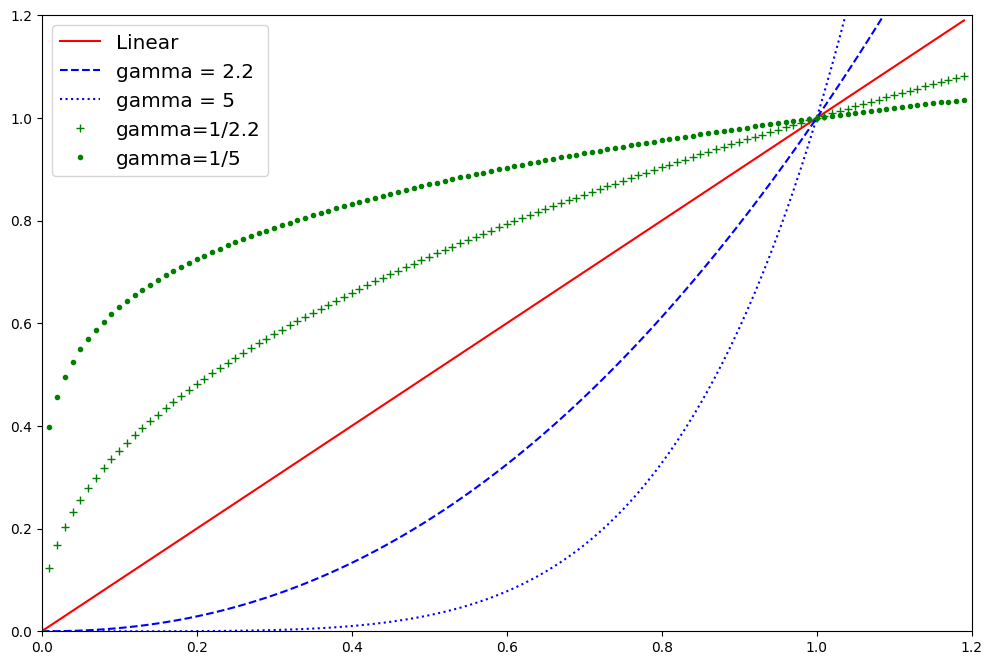

In [83]:
fix, ax = plt.subplots()

ax.plot(x, g1, 'r', label = 'Linear')
ax.plot(x, g2, 'b--', label = 'gamma = 2.2')
ax.plot(x, g3, 'b:', label = 'gamma = 5')
ax.plot(x, g4, 'g+', label = 'gamma=1/2.2')
ax.plot(x, g5, 'g.', label = 'gamma=1/5')


ax.set_xlim([0,1.2])
ax.set_ylim([0, 1.2])
legend = ax.legend(loc='upper left', fontsize = 'x-large')

plt.rcParams['figure.figsize'] = [6, 6]


plt.show()